# Анализ на чувствителността на решението



## Дефицитност на ресурси

В оптималния план $(x^*_1 = 200, x^*_2 = 80)$ заведението изразходва:

$$
\begin{align*}
0.5 x^*_1 + 0.25 x^*_2 & = 0.5 \cdot 200 + 0.25 \cdot 80 & = 120 \text{ кг. арабика} \\
0.5 x^*_1 + 0.75x^*_2 & = 0.5 \cdot 200 + 0.75 \cdot 80 & = 160 \text{ кг. робуста} \\
0 \cdot x^*_1 + x^*_2 & = 0\cdot 200 + 1\cdot 80 & = 80 \text{ кг. търсене Делукс}
\end{align*}
$$

Общо заведението разполага с 120 кг. арабика, 160 кг. робуста и 150 кг. търсене на Делукс. Тъй като в оптимума се изразходва цялото налично количество от арабика и робуста казваме, че тези ресурси са *дефицитни*. Кои ресурси са дефицитни може да се види лесно от графиките. В пресечната точка на две прави едновременно са изпълнени и двете уравнения, които ги определят.

-   Във всяка точка от правата на ограничението за арабика важи, че изразходваното количество арабика е 120 кг., защото ограничението е изпълнено строго.
-   Във всяка точка от правата на ограничението за робуста важи, че изразходваното количество робуста е 120 кг., защото ограничението е изпълнено строго.
-   Във всяка точка от правата на ограничението за търсене на Делукс важи, че изразходваното количество "търсене на Делукс" е 150 кг.

В оптималния план остават $150 - 80 = 70$ кг. неизползвано търсене на Делукс (*slack*). Казваме, че "търсенето на Делукс" е недефицитен ресурс.

## Допустими граници на промяна

-   В какви граници може да се променя ограничението за арабика без да се промени характера на оптималния план (без да се променят дефицитните ресурси)?

-   В какви граници може да се променя ограничението за робуста без да се промени характера на оптималния план (без да се променят дефицитните ресурси)?

-   В какви граници може да се променя ограничението за търсенето на Супер еспресо кафе без да се промени характера на оптималния план (без да се променят дефицитните ресурси, определящи настоящото решение)?

За да видим как се променя решението на задачата, когато варираме наличното количество робуста, ще я решим графично при четири нива на наличност на ресурса: 120 кг., 180 кг., 195 кг. и 220 кг. Уравненията на ограниченията за всяко от тези нива са:

$$
\begin{align*}
0.5 x_1 + 0.75 x_2 & = 160 \text{ налични 160 кг. (първоначална задача)} \\
0.5 x_1 + 0.75 x_2 & = 180 \text{ налични 180 кг.} \\
0.5 x_1 + 0.75 x_2 & = 195 \text{ налични 195 кг.} \\
0.5 x_1 + 0.75 x_2 & = 220 \text{ налични 220 кг.} \\
\end{align*}
$$

Графично тези четири уравнения представляват четири успоредни прави (защото коефициентите пред $x_1$ и $x_2$ са едни и същи) и са изобразени във @fig-coffe-restr-var-robusta-increase.


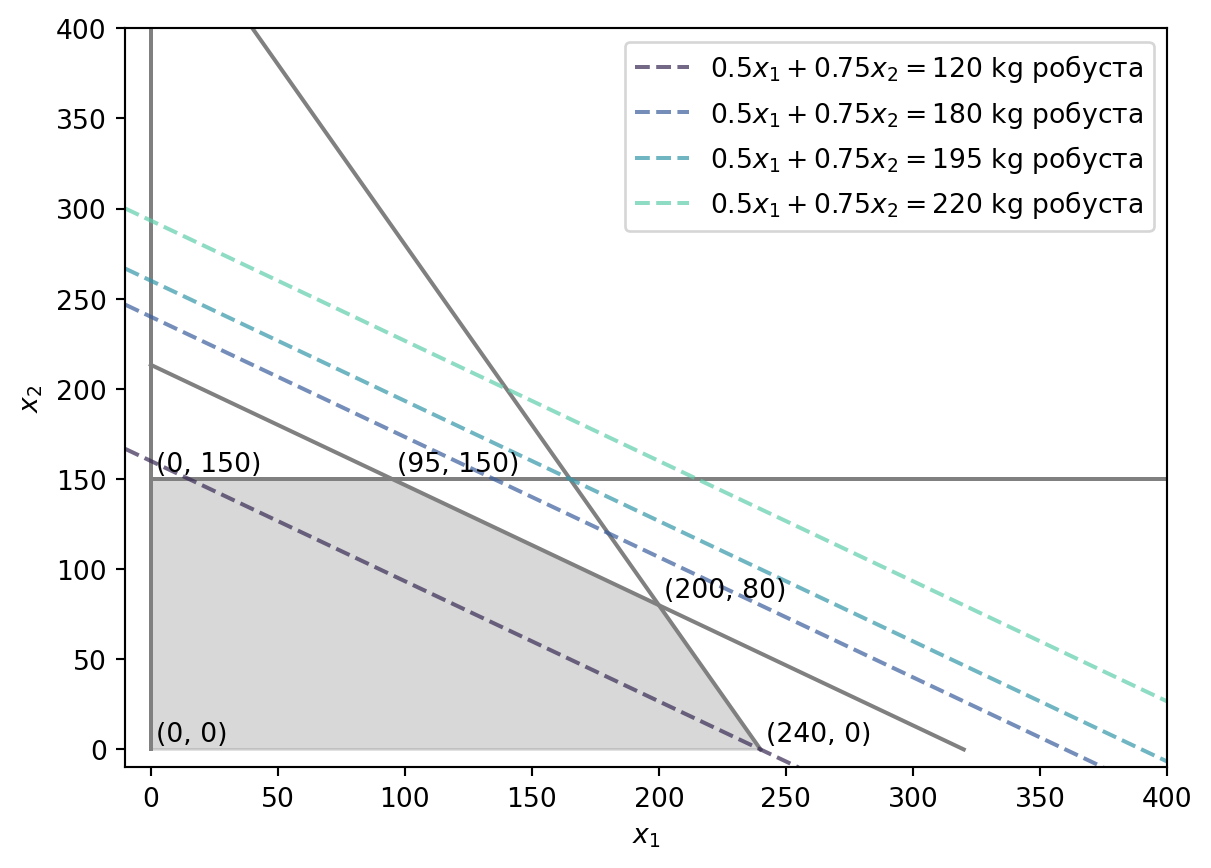

In [1]:
#| label: fig-coffe-restr-var-robusta-increase
#| fig-cap: "Промяна в наличността на робуста"

import matplotlib.pyplot as plt
import seaborn as sns

vertices = [(0, 0), (0, 150), (95, 150), (200, 80), (240, 0)]

vertices_x = [x for x, y in vertices]
vertices_y = [y for x, y in vertices]

plt.plot([0, 240], [480, 0], color='grey')
plt.plot([0, 320], [213.33, 0], color='grey')
plt.plot([0, 0], [0, 150], color='grey')
plt.plot([0, 400], [150, 150], color='grey')
plt.plot([0, 0], [0, 500], color='grey')

plt.fill(vertices_x, vertices_y, color='grey', alpha=0.3)

plt.xlim(-10, 400)
plt.ylim(-10, 400)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

palette = sns.color_palette("mako", n_colors=4).as_hex()

for idx, q in enumerate([120, 180, 195, 220]):
    plt.axline([0, q / 0.75], slope=-0.5/0.75,
               label=fr"$0.5x_1 + 0.75 x_2 = {q}$ kg робуста",
               linestyle='--', 
               color=palette[idx],
               alpha=0.7
               )

for idx, (x, y) in enumerate(vertices):
    plt.annotate(f"({x}, {y})", (x, y), xytext=(2, 3), textcoords='offset points')

plt.legend(loc=0)

In [2]:
#| eval: false
#| echo: false

# Google Colab setup: Clone repo and import module if running on Colab
import sys
import os

if 'google.colab' in sys.modules:
    import subprocess
    subprocess.run(['git', 'clone', 'https://github.com/febse/opt2025.git', '/tmp/opt2025'], 
                   capture_output=True)
    sys.path.insert(0, '/tmp/opt2025')
else:
    # For local Jupyter notebooks, add the parent directory (opt2025) to path
    sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import the coffee blending module from scripts directory
from scripts.coffee_blending import create_interactive_sliders

# Create and display the interactive visualization
create_interactive_sliders()

От графиката виждаме, че при наличие на робуста от повече от 195 кг. се променя характера на оптимума, защото дефицитни стават ресурсите "арабика" и "търсене Делукс". Разликата между 195 кг. и първоначално наличните в задачата 160 кг. наричаме допустимо увеличение на ресурса (195 - 160 = 35 кг.). Новият оптимум е пресечната точка на "арабика" и "търсене на Делукс". Можем да намерим координатите на тази точка като решение на системата от двете уравнения, които съответстват на тези ограничения:

$$
\begin{align*}
0.5 x_1 + 0.25 x_2 & = 120  \\
0 \cdot x_1 + x_2 & = 150
\end{align*}
$$


Решението на системата е (165, 150). За разлика от оптимумите при 160 кг. и 180 кг. робуста, сега дефицитните ресурси са "арабика" и "търсене на Делукс".

В четвъртия случай при наличие на 195 кг. робуста допустимото множество съвпада с това в предходния пример при 220 кг. По тази причина и оптимумът е същият: (165, 150) при ниво на печалба $40 \cdot 165 + 50 \cdot 150 = 14100$ лв.

От тези примери виждаме, че количеството робуста може да се увеличи с най-много $195 - 160 = 35$ кг. без да се промени характера на оптимума. Това количество наричаме допустимо увеличение (allowable increase).


## Оценка на ресурсите (скрити цени)

В предходната секция изчислихме, че можем да увеличим наличността от арабика до 195 кг. без това да промени характера на решението. Максималната печалба при $x_1 = 165, x_2 = 150$ e

$$
z = 40 \cdot 165 + 50 \cdot 150 = 14100.
$$

Тази по-висока печалба можем да постигнем за сметка на $195 - 160 = 35$ кг. допълнително количество робуста. Съотношението между допълнителната печалба и допълнителното количество ресурс наричаме *скрита цена* на (кубинското) кафе:

$$
\frac{\Delta z^*}{\Delta r^*} = \frac{z^{*1} - z^{*}}{r^{*1} - r^{*}} = \frac{14100 - 12000}{195 - 160} =
\frac{2100}{35} = 60
$$

-   Доставчикът предлага да достави допълнителни 10 кг. робуста на цена от 20 лв./кг. Бихте ли препоръчали на заведението да приеме тази оферта?

-   Съседно заведение предлага да купи 5 килограма от арабика на цена 40 лв./кг. Изгодно ли е за заведението да продаде това количество кафе?

-   Мениджърът на заведението предлага да въведе нов продукт, който предполага, че ще може да продава на цена не по-малка от 6 лв./кг. За производството на един килограм от този нов продукт са нужни 0.7 кг. бразилско и 0.3 кг. робуста. Бихте ли препоръчали на фирмата да започне това производство?

## Реализация в `Excel`

Тук можете да изтеглите [пример за реализация в Excel](https://github.com/febse/data/raw/main/opt/Problem_2_coffee_blending.xlsx).


## Задача

Металургично предприятие произвежда стоманени и чугунени отливки на две машини. Производството на една стоманена отливка изисква 2 ч. време на първата машина и 1 час на втората. Чугунените отливки изискват един час на първата машина и три на втората. Общият капацитет на машините е 8 ч. на ден. Компанията се стреми да максимизира печалбата си, към която една стоманена отливка допринася с 100 лв., а чугунена с 120 лв. Колко от коя отливка трябва да произведе компанията, за да максимизира печалбата си?

$$
\begin{align*}
x_s: & \text{ брой стоманени отливки} \\
x_c: & \text{ брой чугунени отливки}
\end{align*}
$$

$$
\max 100x_s + 120x_c \\
$$

$$
\begin{align*}
2 x_s + x_c & \leq 8 \\
x_s + 3x_c & \leq 8 \\
x_s, x_c & \geq 0
\end{align*}
$$

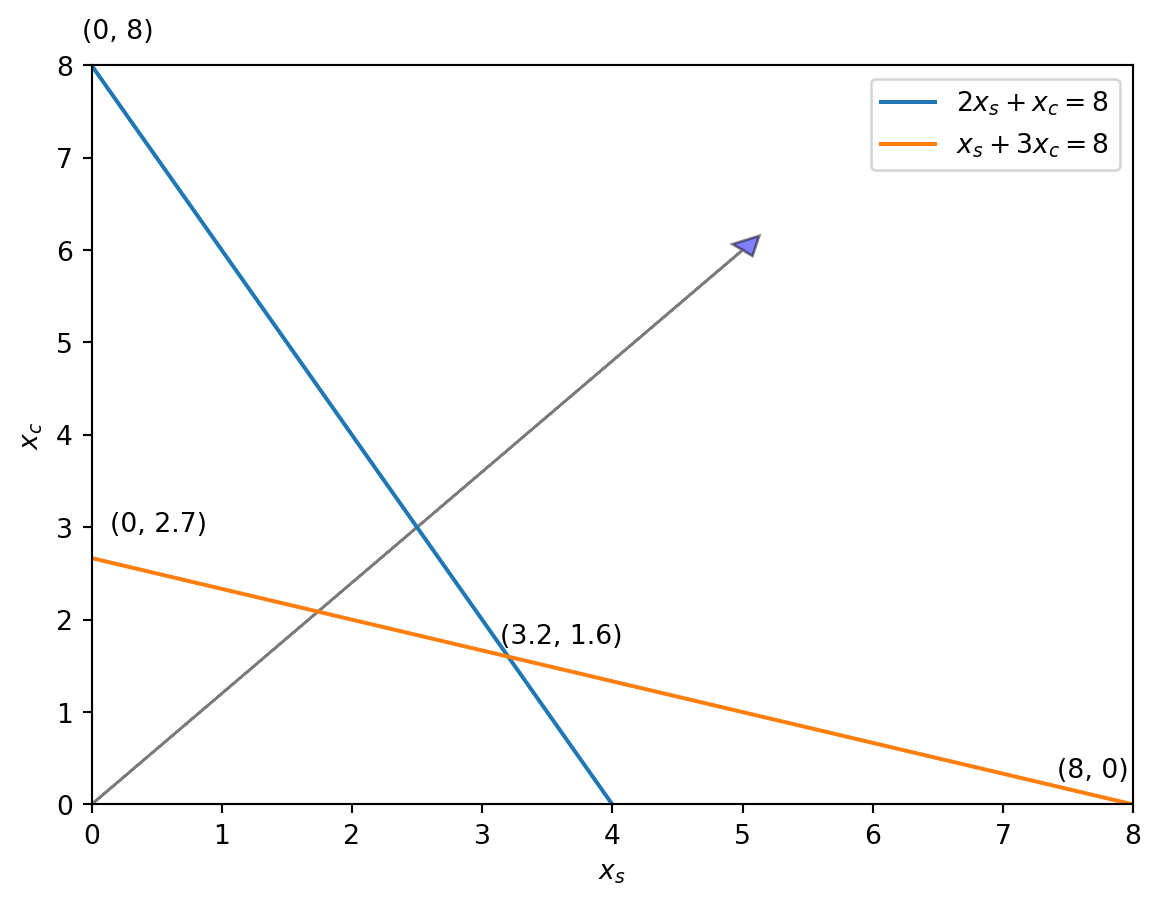

In [3]:
#| fold-code: true

import matplotlib.pyplot as plt

# Define the constraints
x_s = [0, 8]  # Range of x_s values
x_c1 = [0, 8]  # Range of x_c values for constraint 1
x_c2 = [0, 8]  # Range of x_c values for constraint 2

# Plot the constraints
plt.plot(x_s, [8 - 2 * x for x in x_s], label=r"$2x_s + x_c = 8$")
plt.plot(x_s, [(8 - x) / 3 for x in x_s], label=r"$x_s + 3x_c = 8$")

plt.annotate(f"({3.2}, {1.6})", (3.2, 1.6), textcoords="offset points", xytext=(20,5), ha='center')
plt.annotate(f"({8}, {0})", (8, 0), textcoords="offset points", xytext=(-15, 10), ha='center')
plt.annotate(f"({0}, {8})", (0, 8), textcoords="offset points", xytext=(10, 10), ha='center')
plt.annotate(f"({0}, {round(8 / 3, 1)})", (0, 8 / 3), textcoords="offset points", xytext=(25, 10), ha='center')

# Plot the objective coefficient vector

plt.arrow(0, 0, 5, 6, head_width=0.2, head_length=0.2, fc='blue', alpha=0.5)

# Set the x and y axis labels
plt.xlabel(r"$x_s$")
plt.ylabel(r"$x_c$")

# Set the x and y axis limits
plt.xlim(0, 8)
plt.ylim(0, 8)

# Add a legend
plt.legend()

# Show the plot
plt.show()


- Използвайте нормалния вектор, за да намерите оптималния производствен план.
- В какви граници може да се променя капацитетът на машините без да се промени характера (кои ресурси са дефицитни) на оптималния план?
- Определете скритите цени на ресурсите (двете машини)
- Предприятието обмисля да увеличи работния капацитет на машините си. Коя машина би трябвало да е приоритетна?

- Бизнес консултанти препоръчват на предприятието да увеличи капацитета на машините си на цена от 10 лв. на ден за всяка от машините. Бихте ли препоръчали на предприятието да приеме тази оферта?

- Бизнес консултанти препоръчват на предприятието да въведе нов продукт, който би заел 2 ч. на първата машина и 2 ч. на втората машина. Очакваната печалба от продажбата на една единица от този продукт е 125 лв. Бихте ли препоръчали на предприятието да започне производството на този продукт? Колко най-малко трябва да е цената на продукта, за да се оправдае производството му?

- Как би се променила оптималната печалба при увеличение на капацитета на първата машина на 20 ч. на ден?

In [4]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("Casting problem")
m.Params.LogToConsole = 0

# Create variables
x_s = m.addVar(vtype=GRB.CONTINUOUS, name="Steel")
x_c = m.addVar(vtype=GRB.CONTINUOUS, name="Cast iron")

# Set objective
m.setObjective(100 * x_s + 120 * x_c, sense=GRB.MAXIMIZE)

m.addConstr(2 * x_s + x_c <= 8)
m.addConstr(x_s + 3 * x_c <= 8)

# Optimize model
m.optimize()

print(f"Steel: {x_s.x}")
print(f"Cast iron: {x_c.x}")

Set parameter LogToConsole to value 0


Steel: 3.2
Cast iron: 1.6


In [5]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("Casting problem")
m.Params.LogToConsole = 0

# Create variables
x_s = m.addVar(vtype=GRB.CONTINUOUS, name="Steel")
x_c = m.addVar(vtype=GRB.CONTINUOUS, name="Cast iron")
x_n = m.addVar(vtype=GRB.CONTINUOUS, name="New product")

# Set objective
m.setObjective(100 * x_s + 120 * x_c + 125 * x_n, sense=GRB.MAXIMIZE)

m.addConstr(2 * x_s + x_c + 2 * x_n <= 8)
m.addConstr(x_s + 3 * x_c + 2 * x_n <= 8)

# Optimize model
m.optimize()

print(f"Steel: {x_s.x}")
print(f"Cast iron: {x_c.x}")
print(f"New product: {x_n.x}")

Set parameter LogToConsole to value 0


Steel: 3.2
Cast iron: 1.6
New product: 0.0


Даден е следния оптимизационен проблем:

$$
\begin{align*}
\max 3x_1 + 2x_2 \\
\text{при условия} \\
\end{align*}
$$
$$
\begin{align*}
x_1 + x_2 & \leq 4 \\
2x_1 + x_2 & \geq 10 \\
x_1, x_2 & \geq 0
\end{align*}
$$


(0.0, 10.0)

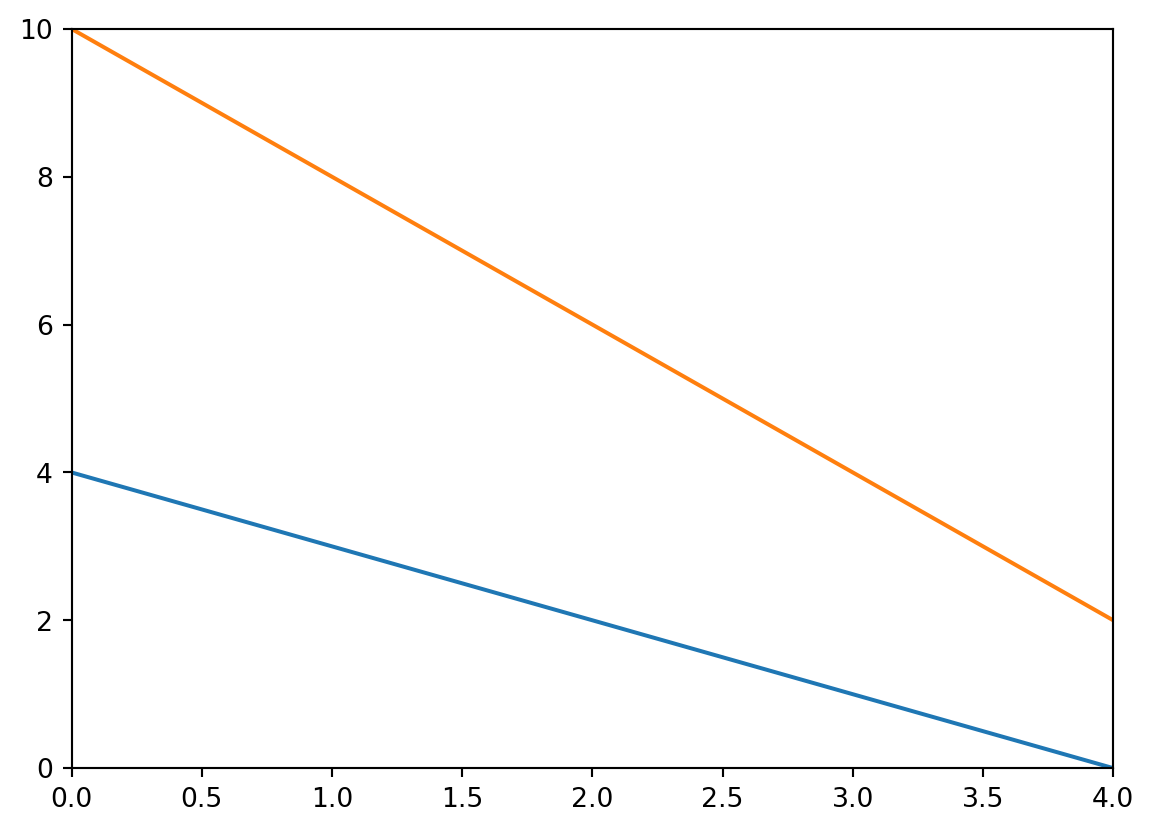

In [6]:
# Plot the constraints

import matplotlib.pyplot as plt

# Define the constraints

x_1 = [0, 8]  # Range of x_s values
x_2 = [0, 20]  # Range of x_c values for constraint 1

plt.plot(x_1, [4 - 1 * x for x in x_1], label=r"$x_1 + x_2 = 4$")
plt.plot(x_1, [10 - 2 * x for x in x_1], label=r"$2x_1 + x_2 = 10$")
plt.xlim(0, 4)
plt.ylim(0, 10)

Дадена е следната задача:

$$
\begin{align*}
\max 3x_1 + 2x_2 \\
\text{при условия} \\
\end{align*}
$$

$$
\begin{align*}
x_1 + x_2 & \geq 4 \\
x_1, x_2 & \geq 0
\end{align*}
$$



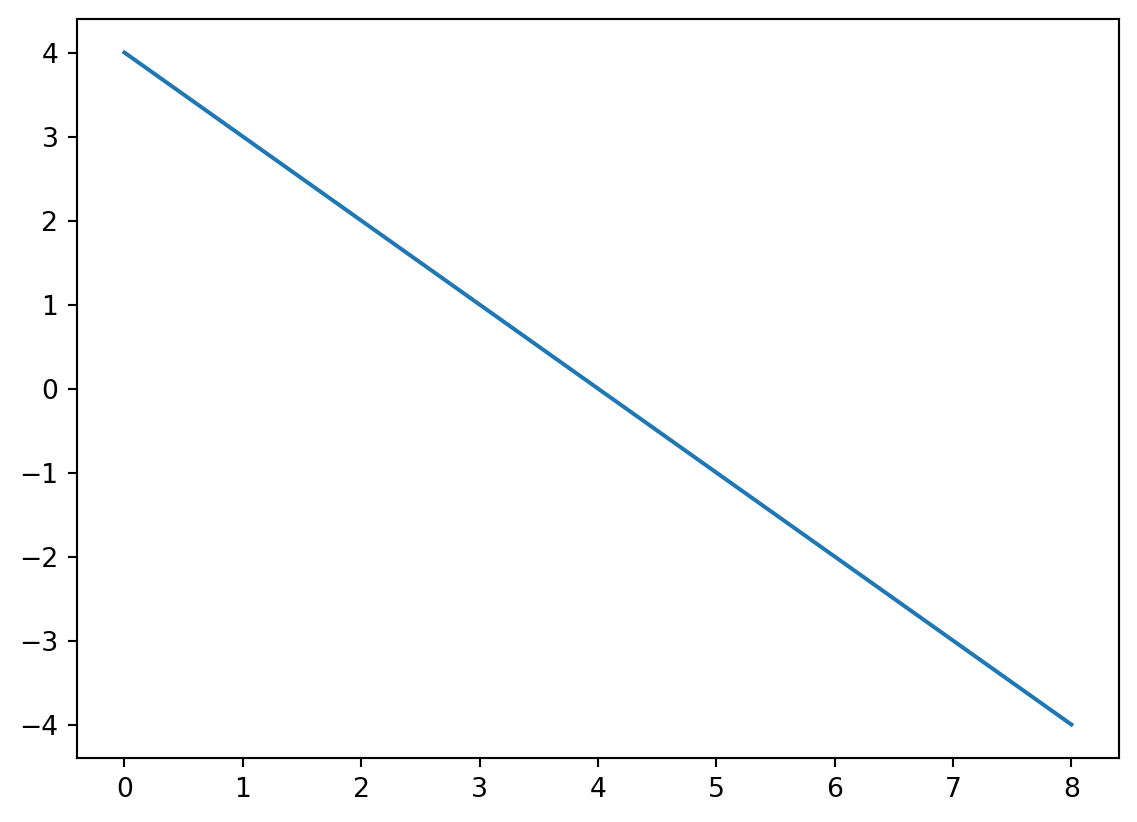

In [7]:
x_1 = [0, 8]  # Range of x_s values

plt.plot(x_1, [4 - 1 * x for x in x_1], label=r"$x_1 + x_2 = 4$")
